In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load Dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\swiggy.csv")

In [3]:
df.head(5)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [5]:
df.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [6]:
# Data Cleaning
df['cost'] = df['cost'].str.replace('\u20b9', '').str.strip()
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.extract(r'(\d+[\+K]?)')
df['rating_count'] = df['rating_count'].str.replace('+', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df.dropna(subset=['name', 'rating', 'cost', 'cuisine'], inplace=True)

## Univariate Analysis


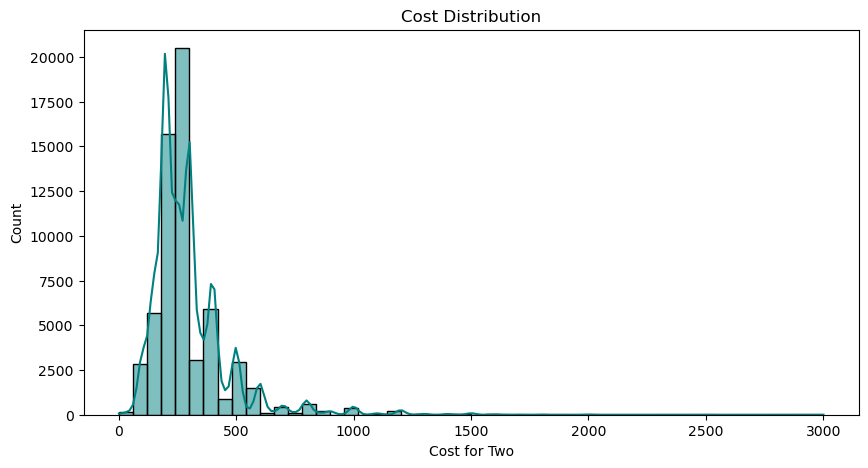

In [7]:
# Cost Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['cost'], bins=50, kde=True, color='teal')
plt.title('Cost Distribution')
plt.xlabel('Cost for Two')
plt.ylabel('Count')
plt.show()

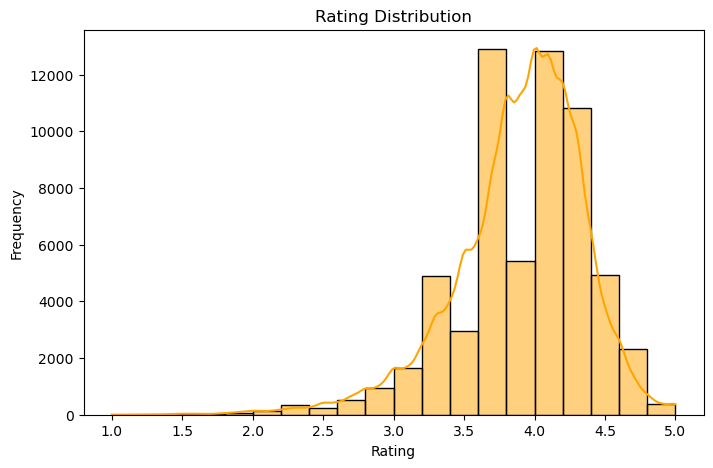

In [8]:
# Rating Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True, color='orange')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

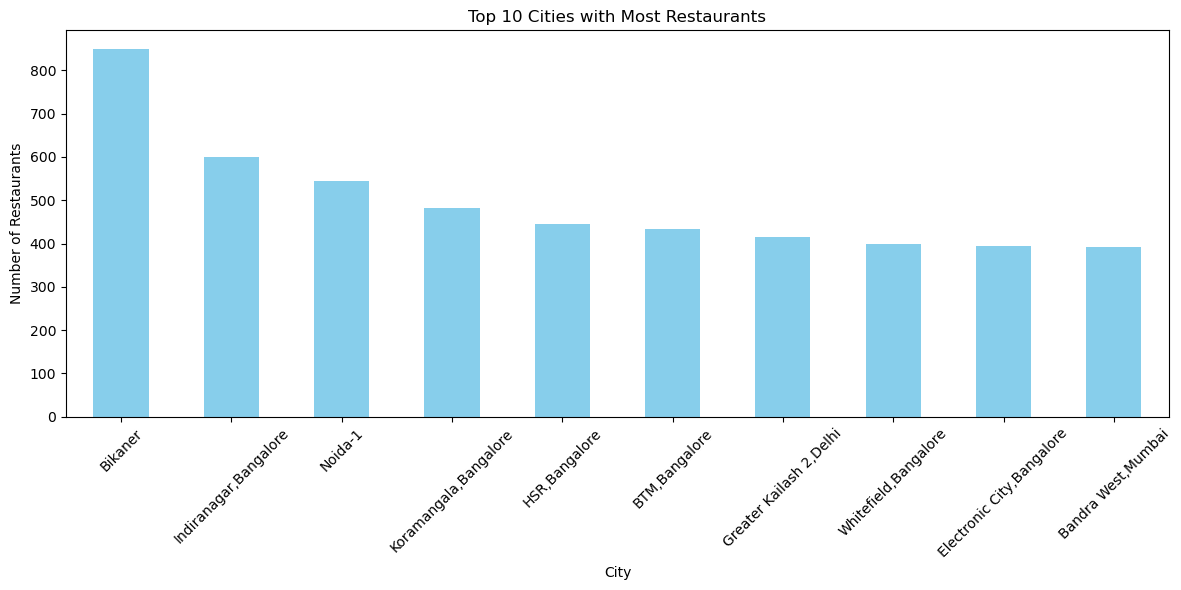

In [9]:
# Top Cities
plt.figure(figsize=(12,6))
df['city'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Top Cuisines
cuisine_series = df['cuisine'].dropna().str.split(',')
cuisines = Counter()
for sublist in cuisine_series:
    cuisines.update([c.strip() for c in sublist])

top_cuisines = dict(cuisines.most_common(10))

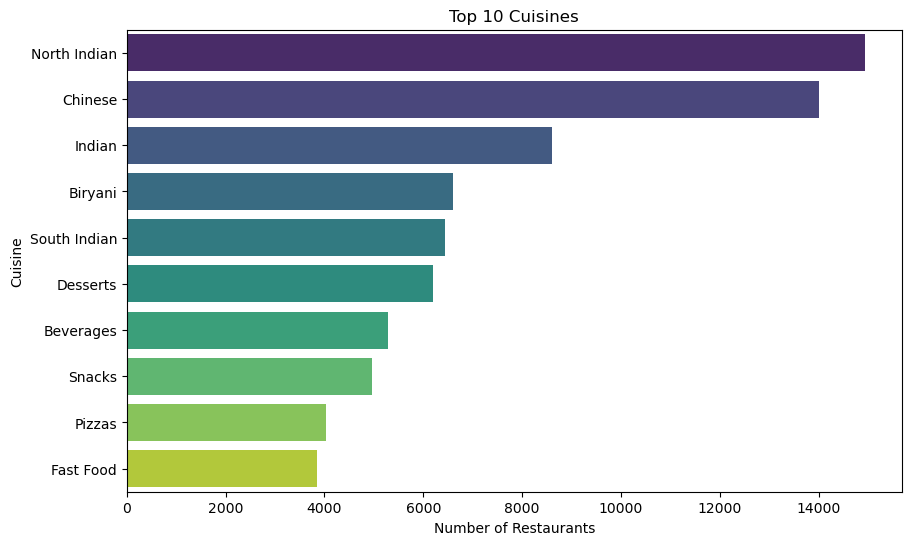

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_cuisines.values()), y=list(top_cuisines.keys()), palette='viridis')
plt.title('Top 10 Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

## Bivariate Analysis

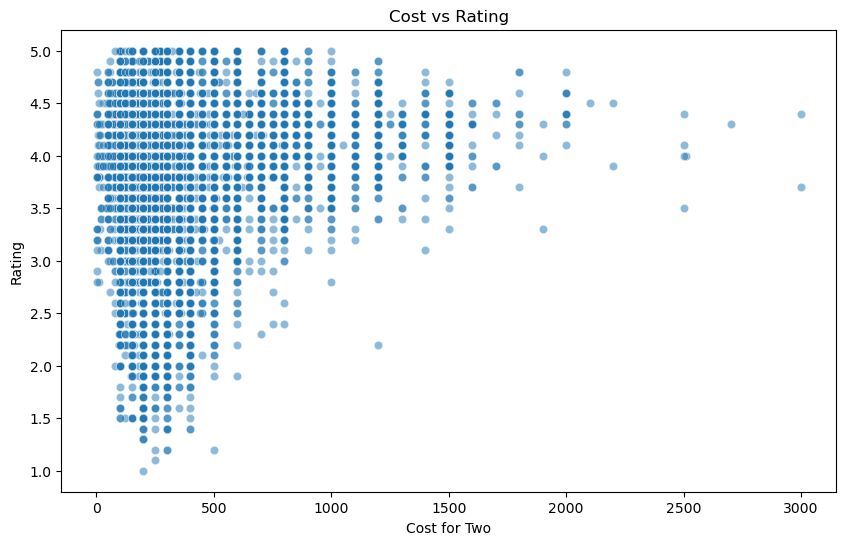

In [12]:
# Rating vs Cost
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='cost', y='rating', alpha=0.5)
plt.title('Cost vs Rating')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.show()

## Rating vs Rating Count

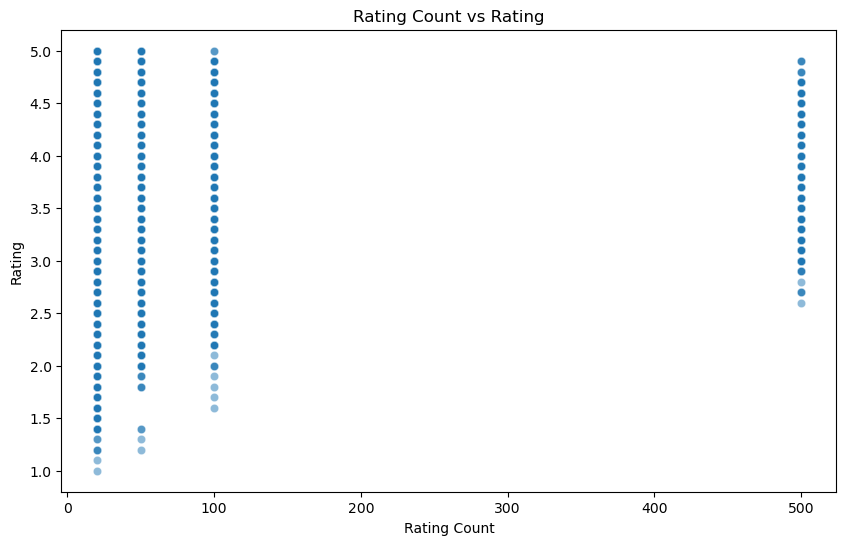

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='rating_count', y='rating', alpha=0.5)
plt.title('Rating Count vs Rating')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

In [31]:
# Boxplot of cost across Top Cuisines
top_cuisine_names = list(top_cuisines.keys())
swiggy_cuisine_filtered = df[df['cuisine'].apply(lambda x: any(c in x for c in top_cuisine_names))]
swiggy_cuisine_filtered['main_cuisine'] = swiggy_cuisine_filtered['cuisine'].apply(lambda x: next((c for c in top_cuisine_names if c in x), 'Other'))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14956\1927000835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swiggy_cuisine_filtered['main_cuisine'] = swiggy_cuisine_filtered['cuisine'].apply(lambda x: next((c for c in top_cuisine_names if c in x), 'Other'))


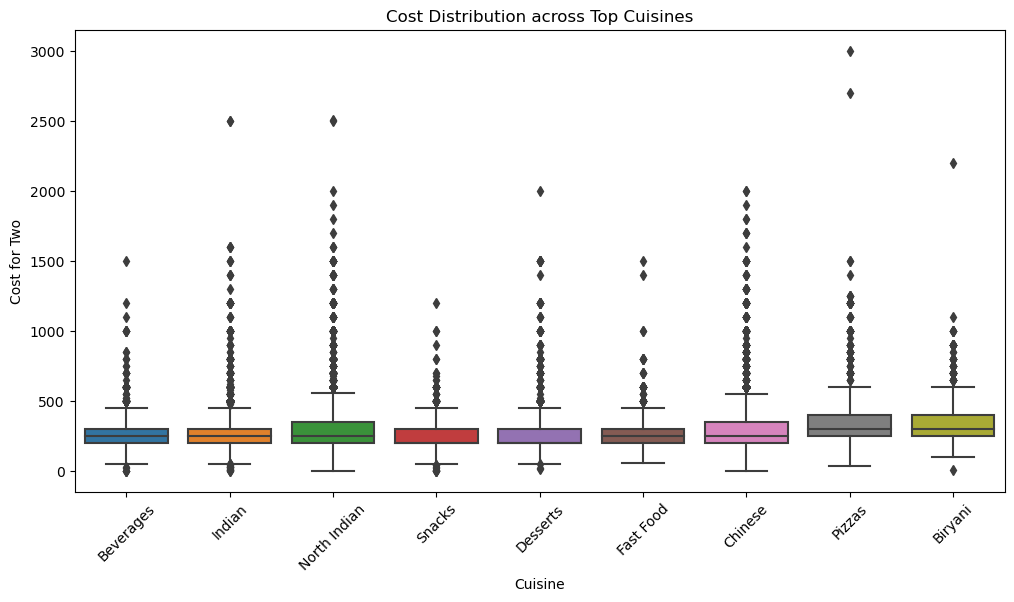

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x='main_cuisine', y='cost', data=swiggy_cuisine_filtered)
plt.title('Cost Distribution across Top Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Cost for Two')
plt.xticks(rotation=45)
plt.show()

## Q1. Which city has the most restaurants?

In [14]:
df['city'].value_counts().idxmax()

'Bikaner'

## Q2. Which is the most common cuisine?

In [15]:
cuisines.most_common(1)[0][0]

'North Indian'

## Q3. What is the average cost for two people?

In [18]:
"{:.2f}".format(df['cost'].mean())

'297.64'

## Q4. Which restaurant has the highest rating?

In [19]:
df.loc[df['rating'].idxmax()][['name', 'rating', 'city']]

name      Pablo Premium Kitchen
rating                      5.0
city                       Agra
Name: 752, dtype: object

## Q5. How many restaurants have rating above 4.5?

In [20]:
len(df[df['rating'] > 4.5])

2702

## Q6. What is the average rating for each city?

In [21]:
df.groupby('city')['rating'].mean().sort_values(ascending=False).head()

city
Chopda             4.825
Kumta              4.800
Kadayanallur       4.525
Dhanbad            4.400
Fatehgarh-sahib    4.340
Name: rating, dtype: float64

## Q7. What is the distribution of rating counts? 

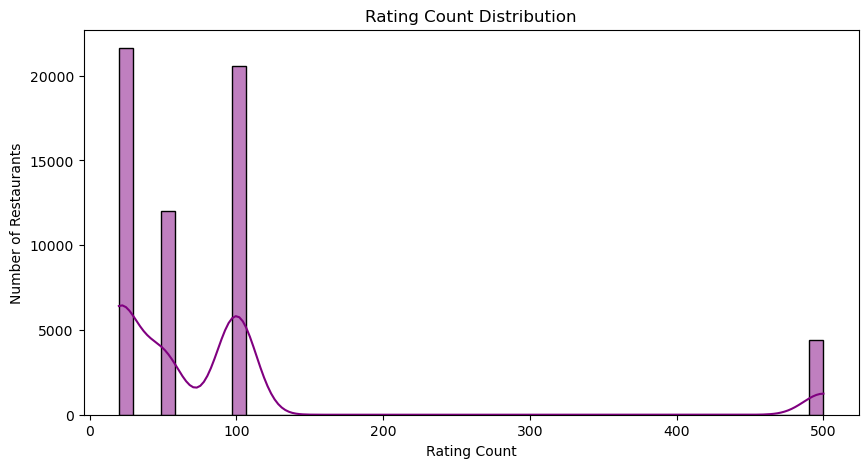

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['rating_count'], bins=50, kde=True, color='purple')
plt.title('Rating Count Distribution')
plt.xlabel('Rating Count')
plt.ylabel('Number of Restaurants')
plt.show()

## Q8. Which cuisine has the highest average rating?

In [23]:
cuisine_ratings = []
for cuisine in cuisines:
    mask = df['cuisine'].str.contains(cuisine, na=False)
    cuisine_ratings.append((cuisine, df[mask]['rating'].mean()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14956\548217838.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['cuisine'].str.contains(cuisine, na=False)


In [24]:
cuisine_ratings.sort(key=lambda x: x[1], reverse=True)
cuisine_ratings[:5]

[('Paan', 4.407142857142857),
 ('Greek', 4.324999999999999),
 ('Ice Cream Cakes', 4.313157894736842),
 ('Vietnamese', 4.2857142857142865),
 ('Keto', 4.279310344827586)]

## Q9. Which restaurants has the highest cost?

In [25]:
df.loc[df['cost'].idxmax()][['name', 'cost', 'city']]

name    KooX - Rooftop Asian Grill
cost                        3000.0
city               T Nagar,Chennai
Name: 43861, dtype: object

## Q10. Are restaurants with more reviews rated higher?

In [26]:
df[['rating', 'rating_count']].corr()

,rating,rating_count
rating,1.000000,0.144088
rating_count,0.144088,1.000000


In [27]:
# Restaurants with cost > 8000 INR
high_cost = df[df['cost'] > 8000]
len(high_cost)

0

In [28]:
# Restaurants with rating < 2.5
low_rated = df[df['rating'] < 2.5]
len(low_rated)

608

In [29]:
# Average cost by city
avg_cost_city = df.groupby('city')['cost'].mean().sort_values(ascending=False).head(10)
avg_cost_city

city
Khan Market,Delhi              623.809524
Fort Colaba,Mumbai             527.439490
New DLF Phase 4,Gurgaon        491.666667
Koregaon Park,Pune             489.354839
Bandra West,Mumbai             484.910714
Jubilee Hills,Hyderabad        478.426136
Central Bangalore,Bangalore    475.712727
Kalyani Nagar,Pune             475.096154
Central Kolkata,Kolkata        472.350453
North-goa                      441.589958
Name: cost, dtype: float64

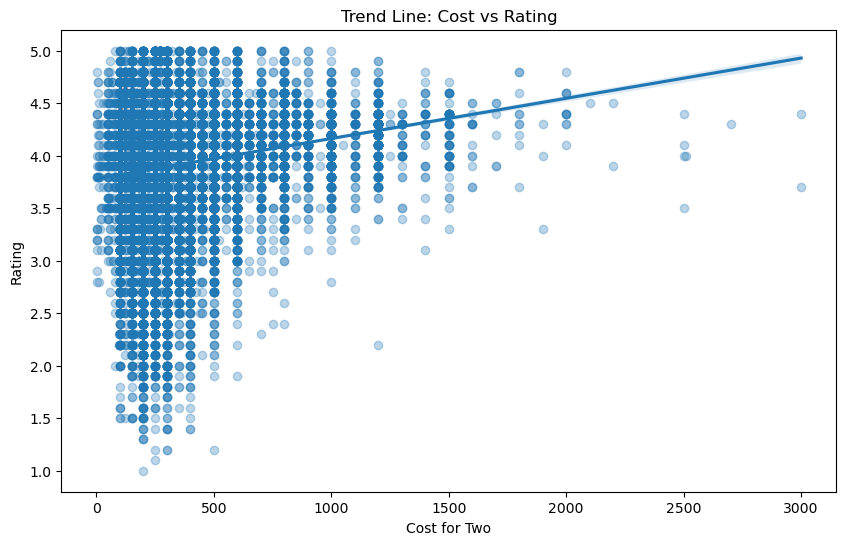

In [30]:
# Cost vs Rating trend line
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='cost', y='rating', scatter_kws={'alpha':0.3})
plt.title('Trend Line: Cost vs Rating')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.show()

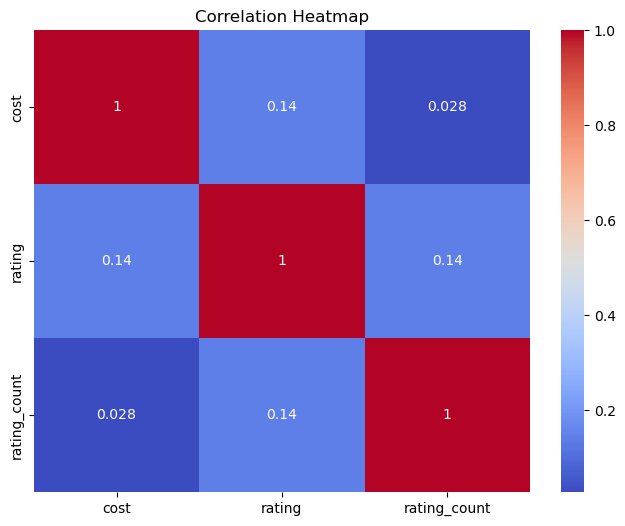

In [33]:
# Heatmap of correlation
plt.figure(figsize=(8,6))
sns.heatmap(df[['cost', 'rating', 'rating_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

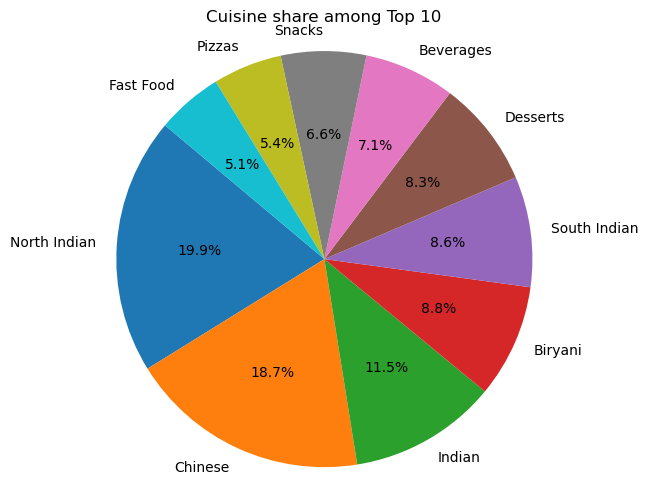

In [34]:
# Pie chart of top cuisines
plt.figure(figsize=(8,6))
plt.pie(top_cuisines.values(), labels=top_cuisines.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Cuisine share among Top 10')
plt.axis('equal')
plt.show()

In [35]:
# City-wise Cuisine Count 
top_city_cuisine = df.groupby(['city'])['cuisine'].apply(lambda x: x.str.split(',').explode().value_counts().head(1)).reset_index()
top_city_cuisine.columns = ['City', 'Cuisine', 'Count']
top_city_cuisine.sort_values(by='Count', ascending = False).head(10)

,City,Cuisine,Count
130,Bikaner,North Indian,286
538,Noida-1,North Indian,195
567,Patna,Chinese,158
776,"sohna road,Gurgaon",North Indian,134
303,"Indiranagar,Bangalore",North Indian,125
262,"Greater Kailash 2,Delhi",Chinese,113
214,"Electronic City,Bangalore",North Indian,113
728,Udaipur,North Indian,109
622,"Rohini,Delhi",North Indian,106
273,"HSR,Bangalore",North Indian,104


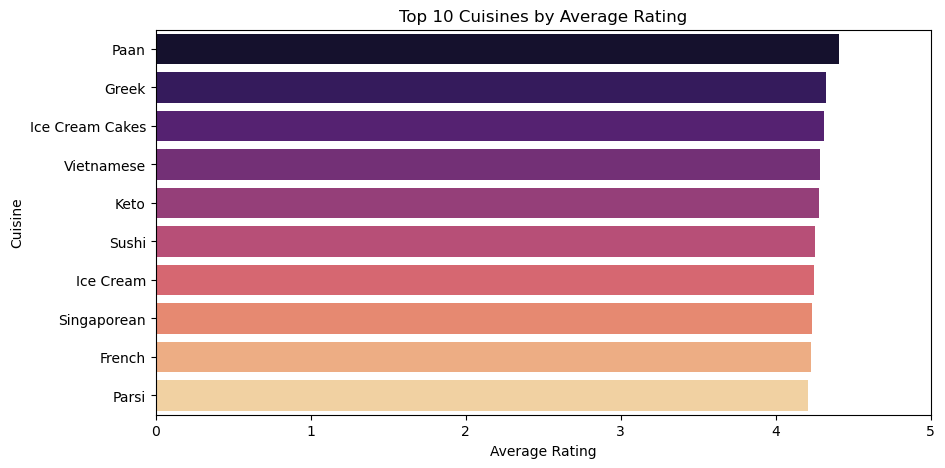

In [36]:
# Average Rating by Cuisine
avg_rating_by_cuisine = pd.DataFrame(cuisine_ratings[:10], columns=['Cuisine', 'Avg_Rating'])
plt.figure(figsize=(10,5))
sns.barplot(data=avg_rating_by_cuisine, x='Avg_Rating', y='Cuisine', palette='magma')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.xlim(0,5)
plt.show()